궁금한 지역을 동단위로 입력하시오 청원구 우암동


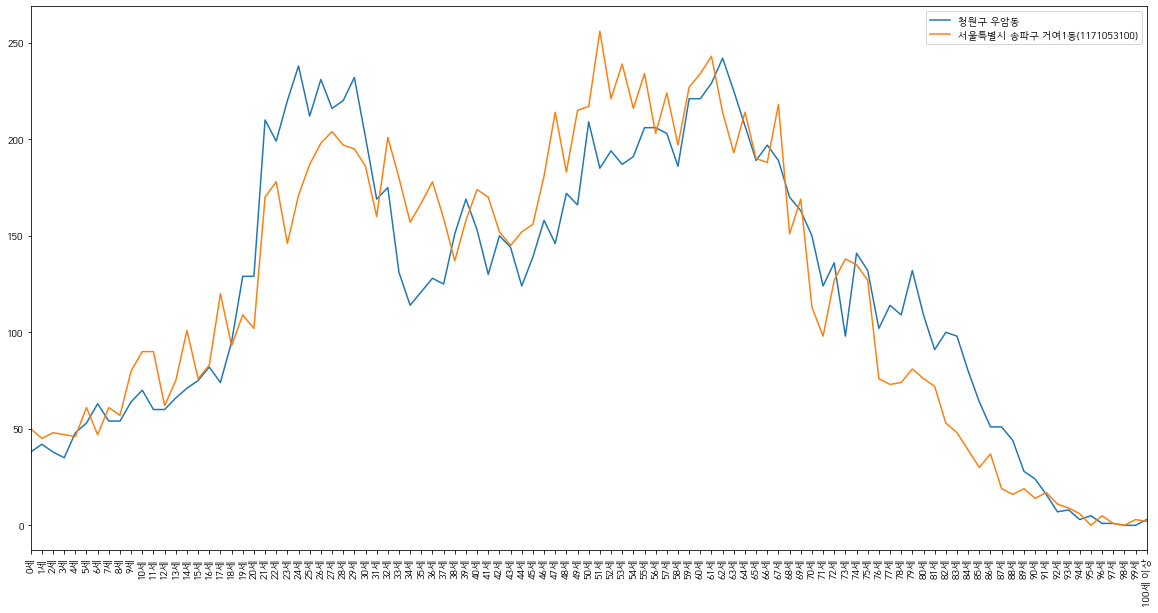

In [110]:
import csv
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np

font_path = r'C:\Windows\Fonts\HANDotum.ttf'
font = font_manager.FontProperties(fname=font_path, size=16).get_name()
rc('font', family=font)

f=open('D:\Data_Analysis\인구현황.csv', 'r', encoding='cp949')
data = csv.reader(f)
next(data)
header = next(data)
title = [tit[11:] for tit in header[3:104]]
data=list(data)
#print(title)
#print(header)
name=input('궁금한 지역을 동단위로 입력하시오 ')
#name='수곡1동'
home = []
for row in data:
    if name in row[0]:
        tot_per = int(row[1])
        for i in row[3:104]:
            home.append(int(i))
            
#print(tot_per)
min_num=int(data[0][1])
address=''
for row in data:
    if abs(tot_per - int(row[1]))<min_num and name not in row[0]:
        min_num=abs(tot_per - int(row[1]))
        address=row[0]

ser_home = []        
for row in data:
    if address in row[0]:
        tot_per = int(row[1])
        for i in row[3:104]:
            ser_home.append(int(i))
        
plt.figure(figsize=(20,10))
plt.plot(title, home, label=name)
plt.plot(title, ser_home,label=address)
plt.xticks(rotation=90)
plt.xlim([0,len(title)-1])
plt.legend()
plt.show()

부산광역시 사하구 감천제1동(2638062000) 18278


<ipython-input-111-4f5bb00f11f3>:3: RuntimeWarning: invalid value encountered in true_divide
  age_pct = np.array(row[3:104], dtype=int) / int(row[2])


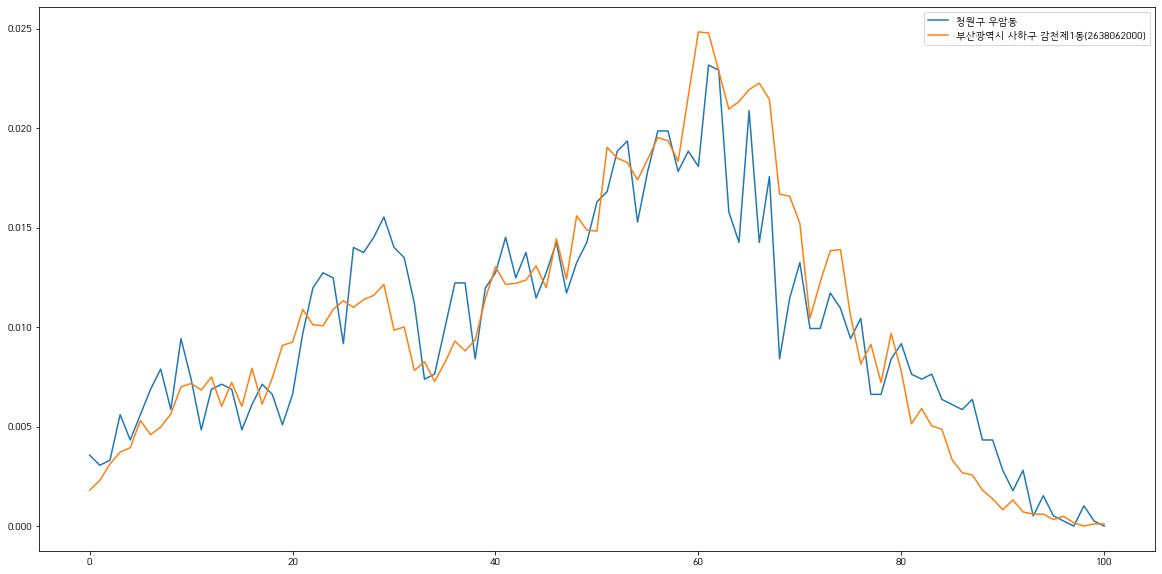

In [111]:
age_pct = [0]
for row in data:
    age_pct = np.array(row[3:104], dtype=int) / int(row[2])

#print(age_pct)

mx=1
for row in data:
    if np.sum(home)*0.9 < int(row[1]):
        away = np.array(row[3:104], dtype=int) / int(row[2])
        s = abs(np.sum(age_pct - away))
        if s<mx:
            mx = s
            result_name = row[0]
            result = away
            away_num=np.array(row[3:104], dtype=int)
        
print(result_name, np.sum(away_num))

plt.figure(figsize=(20,10))
plt.plot(age_pct, label = name)
plt.plot(result, label = result_name)
plt.legend()
plt.show()